In [2]:
import pandas as pd
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
import gpxpy.geo
from datetime import datetime, timedelta
from joblib import dump, load

In [3]:
df = pd.read_csv('data/clean_data.csv', compression = 'gzip')

In [4]:
len(df)

3708329

# Geospacial Feature Engineering - Clustering/Segmentation
## Here, we have divided whole India into regions using “K-Means Clustering”.

In [5]:
coord = df[["pick_lat", "pick_lng"]].values
neighbors = []


In [6]:
def min_distance(regionCenters, totalClusters):
    good_points = 0
    bad_points = 0
    less_dist = []
    more_dist = []
    min_distance = np.inf  #any big number can be given here
    for i in range(totalClusters):
        good_points = 0
        bad_points = 0
        for j in range(totalClusters):
            if j != i:
                distance = gpxpy.geo.haversine_distance(latitude_1 = regionCenters[i][0], longitude_1 = regionCenters[i][1], latitude_2 = regionCenters[j][0], longitude_2 = regionCenters[j][1])
                distance = distance/(1.60934*1000)   #distance from meters to miles
                min_distance = min(min_distance, distance) #it will return minimum of "min_distance, distance".
                if distance < 2:
                    good_points += 1
                else:
                    bad_points += 1
        less_dist.append(good_points)
        more_dist.append(bad_points)
    print("On choosing a cluster size of {}".format(totalClusters))
    print("Avg. Number clusters within vicinity where inter cluster distance < 2 miles is {}".format(np.ceil(sum(less_dist)/len(less_dist))))
    print("Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is {}".format(np.ceil(sum(more_dist)/len(more_dist))))
    print("Minimum distance between any two clusters = {}".format(min_distance))
    print("-"*10)
            
def makingRegions(noOfRegions):
    regions = MiniBatchKMeans(n_clusters = noOfRegions, batch_size = 10000, random_state = 5).fit(coord)
    regionCenters = regions.cluster_centers_ 
    totalClusters = len(regionCenters)
    return regionCenters, totalClusters

In [7]:
startTime = datetime.now()
for i in range(10, 100, 10):
    regionCenters, totalClusters = makingRegions(i)
    min_distance(regionCenters, totalClusters)
print("Time taken = "+str(datetime.now() - startTime))

/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 10
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 1.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 9.0
Minimum distance between any two clusters = 1.8452513910511887
----------


/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 20
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 1.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 19.0
Minimum distance between any two clusters = 1.1545125254364603
----------


/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 30
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 2.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 28.0
Minimum distance between any two clusters = 0.9690218826203557
----------


/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 40
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 3.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 37.0
Minimum distance between any two clusters = 0.8594317659161279
----------


/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 50
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 4.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 46.0
Minimum distance between any two clusters = 0.583255561841056
----------


/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 60
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 4.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 56.0
Minimum distance between any two clusters = 0.5957341217534055
----------


/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 70
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 4.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 66.0
Minimum distance between any two clusters = 0.6750731857249529
----------


/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 80
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 4.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 76.0
Minimum distance between any two clusters = 0.6319871055112417
----------


/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


On choosing a cluster size of 90
Avg. Number clusters within vicinity where inter cluster distance < 2 miles is 6.0
Avg. Number clusters outside of vicinity where inter cluster distance > 2 miles is 84.0
Minimum distance between any two clusters = 0.4990331925291192
----------
Time taken = 0:00:35.848801


### I want the minimum inter cluster distance between any two clusters to be less than 0.5miles and when number of clusters are 50 then this condition is meeting. Therefore, we are considering number of clusters to be 50.

The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

In [8]:
coord = df[["pick_lat", "pick_lng"]].values
regions = MiniBatchKMeans(n_clusters = 50, batch_size = 10000, random_state = 0).fit(coord)
df["pickup_cluster"] = regions.predict(df[["pick_lat", "pick_lng"]])

/home/misango/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


/home/misango/.local/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


In [9]:
df

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min,pickup_cluster
0,2020-10-10 07:34:16,-1,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254,45
1,2020-10-11 08:23:42,-1,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489,21
2,2020-10-11 11:57:17,-1,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213,16
3,2020-10-16 17:51:07,-1,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553,48
4,2020-10-30 09:00:44,-1,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,2021-02-12 19:37:11,99999,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24,1498,24
3708325,2021-02-19 20:43:25,99999,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169,10146,24
3708326,2021-02-20 17:34:45,99999,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20,1251,44
3708327,2021-02-27 08:26:23,99999,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158,9531,7


In [10]:
## Model to Define pickup cluster, given latitude and longitude
dump(regions, '/home/misango/code/TaxiRequest_ML_Forecaster/Model/pickup_cluster_model.joblib', compress = 3)

['/home/misango/code/TaxiRequest_ML_Forecaster/Model/pickup_cluster_model.joblib']

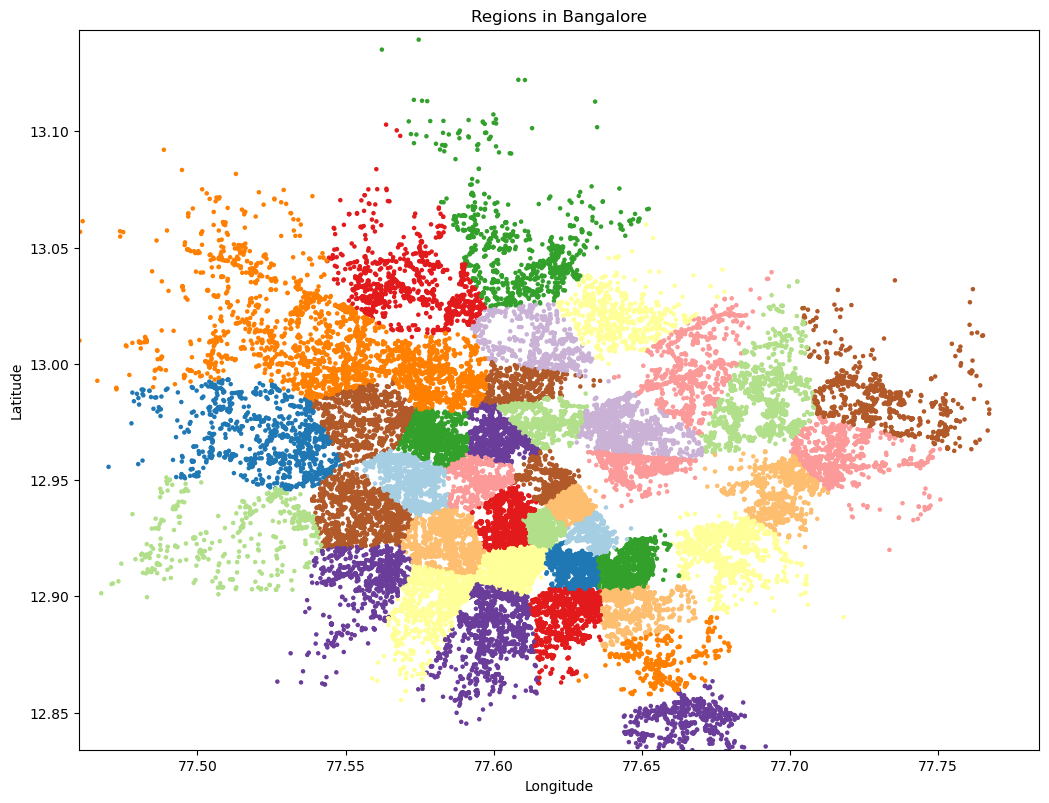

In [11]:
### These pickup clusters tell in which area most ride requests are coming. 
### Plotting Regions in Bangalore (our most rides requests here)
#### Bangalore:'boundingbox': ['12.8340125', '13.1436649', '77.4601025', '77.7840515']
bangalore_latitude_range = (12.8340125, 13.1436649)
bangalore_longitude_range = (77.4601025, 77.7840515)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = df.pick_lng.values[:100000], y = df.pick_lat.values[:100000], c = df.pickup_cluster.values[:100000], cmap = "Paired", s = 5)
ax.set_xlim(77.4601025, 77.7840515)
ax.set_ylim(12.8340125, 13.1436649)
ax.set_title("Regions in Bangalore")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()
#Longitude values vary from left to right i.e., horizontally
#Latitude values vary from top to bottom means i.e., vertically

In [12]:
df.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min,pickup_cluster
0,2020-10-10 07:34:16,-1,12.975773,77.57107,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254,45
1,2020-10-11 08:23:42,-1,12.930813,77.60953,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489,21
2,2020-10-11 11:57:17,-1,12.960213,77.58746,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213,16
3,2020-10-16 17:51:07,-1,12.924353,77.54941,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553,48
4,2020-10-30 09:00:44,-1,12.945731,77.62250,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629,47


## Summing Ride Request Count to 30mins Interval groupby pickup cluster

In [13]:
def round_timestamp_30interval(x):
    if type(x)==str:
        x = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return x- timedelta(minutes=x.minute%30, seconds=x.second, microseconds=x.microsecond)

df['ts'] = np.vectorize(round_timestamp_30interval)(df['ts'])


In [14]:

dataset = deepcopy(df)
dataset.ts = pd.to_datetime(dataset.ts)
dataset

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min,pickup_cluster
0,2020-10-10 07:30:00,-1,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254,45
1,2020-10-11 08:00:00,-1,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489,21
2,2020-10-11 11:30:00,-1,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213,16
3,2020-10-16 17:30:00,-1,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553,48
4,2020-10-30 09:00:00,-1,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,2021-02-12 19:30:00,99999,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24,1498,24
3708325,2021-02-19 20:30:00,99999,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169,10146,24
3708326,2021-02-20 17:30:00,99999,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20,1251,44
3708327,2021-02-27 08:00:00,99999,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158,9531,7


In [15]:
dataset = dataset[['ts','number','pickup_cluster']]

In [16]:
dataset=dataset.groupby(by = ['ts','pickup_cluster']).count().reset_index()
dataset.columns = ['ts','pickup_cluster','request_count']

In [17]:
dataset

,ts,pickup_cluster,request_count
0,2020-03-26 01:00:00,10,3
1,2020-03-26 01:00:00,19,1
2,2020-03-26 01:30:00,10,1
3,2020-03-26 01:30:00,29,1
4,2020-03-26 01:30:00,45,1
...,...,...,...
551501,2021-03-26 23:30:00,44,7
551502,2021-03-26 23:30:00,45,2
551503,2021-03-26 23:30:00,46,6
551504,2021-03-26 23:30:00,48,3


### There should be: 366days [2020-03-26 to 2021-03-26] * [(24*2) 30mins intervals] * 50 regions = 878400 data rows

In [19]:
import pandas as pd

# Assuming you have imported pandas and your DataFrame is properly defined
lt = []
for x in lt:
    lt.append([x, -1, 0])

temp = pd.DataFrame(lt, columns=['ts', 'pickup_cluster', 'request_count'])

# Concatenate datasets
dataset = pd.concat([dataset, temp], ignore_index=True)

# Check the type of dataset
print(type(dataset))


<class 'pandas.core.frame.DataFrame'>


/tmp/ipykernel_10328/4121375568.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataset = pd.concat([dataset, temp], ignore_index=True)


In [20]:
data = dataset.set_index(['ts', 'pickup_cluster']).unstack().fillna(value=0).asfreq(freq='30Min').stack().sort_index(level=1).reset_index()

In [26]:
# Removing Dummy Cluster
data = data[data.pickup_cluster>=0]

In [24]:
print(len(data))

832200


In [27]:
assert len(data) > 0, "Data should not be empty"

## Adding TimeFeatures
### hour, mins, dayofweek, quarter & month (to capture seasonality winter ride count, summer ride count, rainy weather ride count)
### During Rainy weather or extreme winter or extreme summer months, ride request will vary with weather

In [28]:
data['mins'] = data.ts.dt.minute
data['hour'] = data.ts.dt.hour
data['day'] = data.ts.dt.day
data['month'] = data.ts.dt.month
data['dayofweek'] = data.ts.dt.dayofweek
data['quarter'] = data.ts.dt.quarter

In [29]:
data

,ts,pickup_cluster,request_count,mins,hour,day,month,dayofweek,quarter
0,2020-03-26 01:00:00,0,0.0,0,1,26,3,3,1
1,2020-03-26 01:30:00,0,0.0,30,1,26,3,3,1
2,2020-03-26 02:00:00,0,0.0,0,2,26,3,3,1
3,2020-03-26 02:30:00,0,0.0,30,2,26,3,3,1
4,2020-03-26 03:00:00,0,0.0,0,3,26,3,3,1
...,...,...,...,...,...,...,...,...,...
832195,2021-03-26 21:30:00,49,11.0,30,21,26,3,4,1
832196,2021-03-26 22:00:00,49,7.0,0,22,26,3,4,1
832197,2021-03-26 22:30:00,49,5.0,30,22,26,3,4,1
832198,2021-03-26 23:00:00,49,5.0,0,23,26,3,4,1


In [ ]:
data.to_csv('data/Data_Prepared.csv',index = False, compression = 'gzip')

In [30]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [32]:

#The preferred library is pandas_profiling
import sweetviz as sv
report = sv.analyze(data)
report.show_html("data_analysis_sweetviz.html")

[Step 2/3] Processing Pairwise Features      |████████▉ | [ 89%]   00:08 -> (00:01 left)

In [ ]:
report

NameError: name 'profile' is not defined